In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os 
from pathlib import Path

path = Path('data')
os.listdir(path)

['sample_submission.csv',
 'metadata',
 'patches-fr',
 'pre-extracted',
 'observations',
 'patches_sample',
 'patches-us',
 'rasters']

In [4]:
import pandas as pd 

pd.read_csv(path / 'sample_submission.csv')

,Id,Predicted
0,10000293,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
1,10000302,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
2,10000346,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
3,10000468,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
4,10000481,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
...,...,...
36416,22067746,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
36417,22067972,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
36418,22068007,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
36419,22068076,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...


In [5]:
os.listdir(path / 'observations')

['observations_fr_train.csv',
 'observations_fr_test.csv',
 'observations_us_train.csv',
 'observations_us_test.csv']

In [6]:
obs_fr = pd.read_csv(path / 'observations' / 'observations_fr_train.csv', sep=';')
obs_fr

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
671239,10543820,43.542500,4.967778,1041,train
671240,10304005,43.829823,4.450699,19,train
671241,10433186,43.329414,5.599397,906,train
671242,10352176,43.556637,7.016971,516,train


In [7]:
obs_fr.subset.unique()

array(['train', 'val'], dtype=object)

In [8]:
len(obs_fr[obs_fr.subset == 'train']), len(obs_fr[obs_fr.subset == 'val'])

(656263, 14981)

In [9]:
obs_fr_test = pd.read_csv(path / 'observations' / 'observations_fr_test.csv', sep=';')
obs_fr_test

,observation_id,latitude,longitude
0,10782781,43.601788,6.940195
1,10364138,46.241711,0.683586
2,10692017,45.181095,1.533459
3,10222322,46.938450,5.298678
4,10241950,45.017433,0.960736
...,...,...,...
17290,10579652,43.354008,6.160390
17291,10317161,49.120434,6.089808
17292,10452635,43.297234,6.620753
17293,10543186,43.352056,2.804166


In [10]:
obs_us = pd.read_csv(path / 'observations' / 'observations_us_train.csv', sep=';')
obs_us

,observation_id,latitude,longitude,species_id,subset
0,20000173,33.197660,-116.180680,4911,train
1,20000175,34.037968,-118.876755,4912,train
2,20000176,27.620740,-97.222690,4913,train
3,20000177,29.155582,-95.653930,4914,train
4,20000179,36.605740,-121.959510,4915,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [11]:
data_train = pd.concat([obs_fr, obs_us])
data_train

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [12]:
data_train.species_id.value_counts()

5045     6701
3072     5934
2902     4846
5053     4043
3034     3944
         ... 
14551       3
4581        3
15790       3
15789       3
17036       3
Name: species_id, Length: 17037, dtype: int64

In [13]:
sample = data_train.observation_id.iloc[0]
sample

10561949

In [14]:
def get_patch(sample):
    country_id = str(sample)[0]
    country = 'fr' if country_id == '1' else 'us'
    subfolder = str(sample)[-2:]
    subsubfolder = str(sample)[-4:-2]
    return 'patches-' + country + '/' + subfolder + '/' + subsubfolder 

patch = get_patch(sample)
patch

'patches-fr/49/19'

In [15]:
os.listdir(path / patch)

['10151949_rgb.jpg',
 '10011949_rgb.jpg',
 '10201949_landcover.tif',
 '10631949_altitude.tif',
 '10511949_landcover.tif',
 '10701949_rgb.jpg',
 '10601949_near_ir.jpg',
 '10111949_altitude.tif',
 '10181949_landcover.tif',
 '10201949_altitude.tif',
 '10191949_rgb.jpg',
 '10271949_landcover.tif',
 '10381949_altitude.tif',
 '10491949_landcover.tif',
 '10561949_landcover.tif',
 '10651949_altitude.tif',
 '10011949_near_ir.jpg',
 '10181949_altitude.tif',
 '10381949_near_ir.jpg',
 '10281949_altitude.tif',
 '10161949_landcover.tif',
 '10671949_altitude.tif',
 '10371949_rgb.jpg',
 '10631949_near_ir.jpg',
 '10141949_rgb.jpg',
 '10311949_landcover.tif',
 '10301949_rgb.jpg',
 '10671949_rgb.jpg',
 '10661949_near_ir.jpg',
 '10751949_altitude.tif',
 '10491949_rgb.jpg',
 '10391949_near_ir.jpg',
 '10151949_near_ir.jpg',
 '10101949_near_ir.jpg',
 '10111949_landcover.tif',
 '10351949_altitude.tif',
 '10131949_altitude.tif',
 '10471949_altitude.tif',
 '10011949_landcover.tif',
 '10211949_landcover.tif',
 '

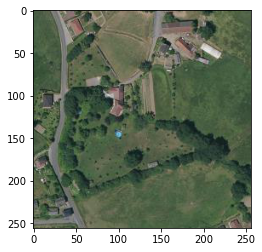

In [16]:
from skimage.io import imread 
import matplotlib.pyplot as plt

img_path = patch + '/' + str(sample) + '_rgb.jpg'
img = imread(path / img_path)
plt.imshow(img)
plt.show()

In [17]:
sample

10561949

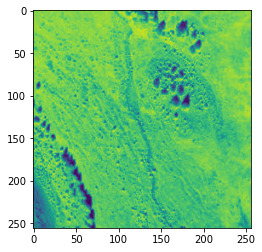

((256, 256), dtype('uint8'), 244, 0)

In [18]:
sample = data_train.sample(1).observation_id.iloc[0]
patch = get_patch(sample)

img_path = patch + '/' + str(sample) + '_near_ir.jpg'
img = imread(path / img_path)
plt.imshow(img)
plt.show()
img.shape, img.dtype, img.max(), img.min()

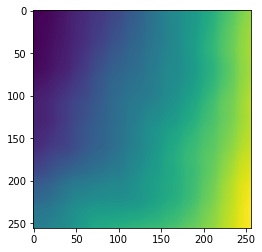

((256, 256), dtype('int16'), 1488, 1354)

In [19]:
sample = data_train.sample(1).observation_id.iloc[0]
patch = get_patch(sample)

img_path = patch + '/' + str(sample) + '_altitude.tif'
img = imread(path / img_path)
plt.imshow(img)
plt.show()
img.shape, img.dtype, img.max(), img.min()

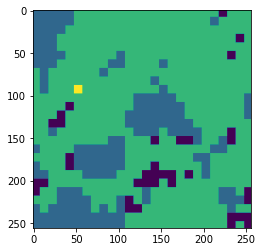

((256, 256), dtype('uint8'), 10, 7)

In [20]:
sample = data_train.sample(1).observation_id.iloc[0]
patch = get_patch(sample)

img_path = patch + '/' + str(sample) + '_landcover.tif'
img = imread(path / img_path)
plt.imshow(img)
plt.show()
img.shape, img.dtype, img.max(), img.min()

In [29]:
df_env = pd.read_csv(path / "pre-extracted" / "environmental_vectors.csv", sep=";", index_col="observation_id")
df_env

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_18,bio_19,bdticm,bldfie,cecsol,clyppt,orcdrc,phihox,sltppt,sndppt
observation_id,,,,,,,,,,,,,,,,,,,,,
10000000,1.420833,6.908333,29.272598,614.14930,15.1,-8.5,23.600000,-1.000000,9.183333,9.466667,...,248.0,358.0,2082.0,988.0,29.0,13.0,63.0,62.0,34.0,53.0
10000001,8.837500,9.858334,37.771393,586.81390,23.8,-2.3,26.099998,6.016667,16.383333,16.383333,...,226.0,288.0,1816.0,1142.0,20.0,22.0,39.0,58.0,41.0,36.0
10000002,6.241667,8.350000,32.239384,632.86090,21.0,-4.9,25.900000,3.033333,14.200000,14.200000,...,268.0,317.0,1346.0,1075.0,29.0,22.0,54.0,59.0,40.0,38.0
10000003,12.554167,9.525001,40.189877,541.80865,25.9,2.2,23.699999,6.850000,19.350000,19.350000,...,157.0,257.0,1227.0,1383.0,21.0,28.0,18.0,71.0,46.0,25.0
10000004,8.029167,10.075000,36.636364,633.01750,23.7,-3.8,27.500000,4.616667,16.083334,16.083334,...,214.0,280.0,2833.0,1202.0,24.0,25.0,33.0,69.0,38.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22068171,20.345833,8.958333,34.455128,641.55160,32.4,6.4,26.000002,27.500000,16.450000,27.866667,...,361.0,280.0,2235.0,1593.0,50.0,37.0,83.0,61.0,32.0,31.0
22068172,13.458333,11.566667,63.553116,249.07861,23.3,5.1,18.199999,10.316667,15.883333,16.383333,...,21.0,551.0,2189.0,1281.0,18.0,22.0,57.0,57.0,22.0,56.0
22068173,15.162500,13.191667,49.222637,519.41895,30.5,3.7,26.800000,8.933333,21.150000,21.633333,...,12.0,324.0,322.0,1366.0,29.0,24.0,52.0,63.0,38.0,38.0


In [22]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663896 entries, 10000000 to 22068176
Data columns (total 27 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   bio_1   1619868 non-null  float64
 1   bio_2   1619868 non-null  float64
 2   bio_3   1619868 non-null  float64
 3   bio_4   1619868 non-null  float64
 4   bio_5   1619868 non-null  float64
 5   bio_6   1619868 non-null  float64
 6   bio_7   1619868 non-null  float64
 7   bio_8   1619868 non-null  float64
 8   bio_9   1619868 non-null  float64
 9   bio_10  1619868 non-null  float64
 10  bio_11  1619868 non-null  float64
 11  bio_12  1619868 non-null  float64
 12  bio_13  1619868 non-null  float64
 13  bio_14  1619868 non-null  float64
 14  bio_15  1619868 non-null  float64
 15  bio_16  1619868 non-null  float64
 16  bio_17  1619868 non-null  float64
 17  bio_18  1619868 non-null  float64
 18  bio_19  1619868 non-null  float64
 19  bdticm  1602774 non-null  float64
 20  bldfie  1602774 

In [34]:
obs_id_train = data_train.observation_id[data_train["subset"] == "train"].values
obs_id_val = data_train.observation_id[data_train["subset"] == "val"].values

X_train = df_env.loc[obs_id_train].values
X_val = df_env.loc[obs_id_val].values

In [24]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)

In [26]:
kk = pd.DataFrame(X_train, columns=df_env.columns)
kk.head()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_18,bio_19,bdticm,bldfie,cecsol,clyppt,orcdrc,phihox,sltppt,sndppt
0,-0.433244,-0.773664,-0.074859,-0.556918,-0.832028,0.270938,-0.766537,-0.908239,0.689792,-0.749646,...,0.084551,0.590022,-0.065227,-0.032023,-0.865647,-0.181382,0.083882,-0.726518,-0.106330,0.181204
1,-2.011868,-0.638805,-0.604809,-0.012030,-1.880879,-1.179680,-0.208016,-1.844712,0.076060,-2.100908,...,0.549818,1.292329,0.001355,-1.533003,1.553358,-0.509394,1.418546,-0.349919,0.126006,0.270929
2,-0.101476,-1.613156,-0.427515,-1.013786,-1.082840,0.806285,-1.383849,-0.896444,0.701019,-0.712341,...,-0.553039,0.271642,0.027844,-0.309982,0.424489,0.474643,0.374026,1.030941,-0.338665,0.001753
3,-0.350055,-1.663728,-0.046433,-1.317779,-1.538862,0.771747,-1.648412,-0.941263,0.498936,-1.130983,...,-0.354869,0.543201,-0.073102,-0.995615,-0.059312,0.146631,-0.032175,-0.098854,0.009838,-0.177698
4,-0.655083,-1.279382,-0.207880,-0.909488,-1.379255,0.340015,-1.178078,-1.262070,0.478354,-1.218028,...,-0.423798,0.103088,-0.279290,-0.587942,0.101955,0.638650,0.083882,0.152212,2.217026,-1.972207


In [7]:
import timm 

timm.list_models('*resnest*')

['resnest14d',
 'resnest26d',
 'resnest50d',
 'resnest50d_1s4x24d',
 'resnest50d_4s2x40d',
 'resnest101e',
 'resnest200e',
 'resnest269e']